In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

In [24]:
df = pd.read_csv('datasets/emails.csv')

In [25]:
print(df)

                                                   text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]


In [26]:
data = df.where((pd.notnull(df)), '')

In [27]:
data.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [29]:
data.shape

(5728, 2)

In [30]:
data.loc[data['text'] == '1', 'text',] = 1
data.loc[data['text'] == '0', 'text',] = 0

In [31]:
X = data['text']
Y = data['spam']

In [32]:
print(X)

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object


In [33]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [35]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5728,)
(4582,)
(1146,)


In [36]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5728,)
(4582,)
(1146,)


In [37]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

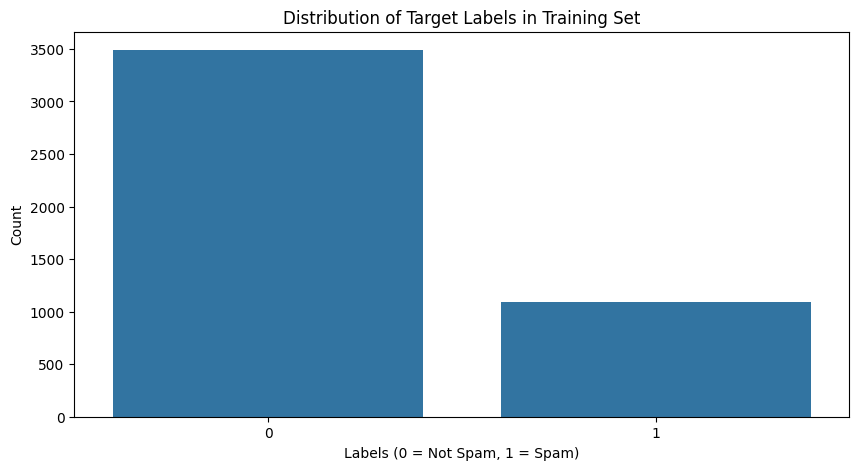

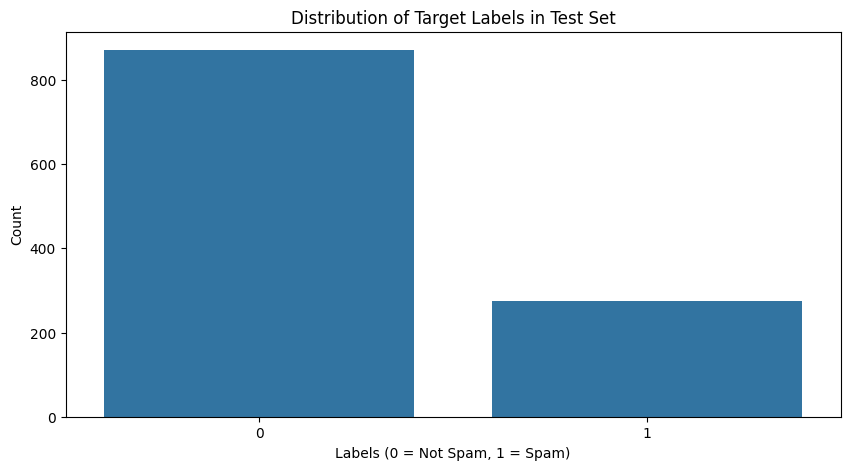

In [38]:
# Visualize the distribution of target labels in the training set
plt.figure(figsize=(10, 5))
sns.countplot(x=Y_train)
plt.title('Distribution of Target Labels in Training Set')
plt.xlabel('Labels (0 = Not Spam, 1 = Spam)')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of target labels in the test set
plt.figure(figsize=(10, 5))
sns.countplot(x=Y_test)
plt.title('Distribution of Target Labels in Test Set')
plt.xlabel('Labels (0 = Not Spam, 1 = Spam)')
plt.ylabel('Count')
plt.show()

In [39]:
model = LogisticRegression()

In [40]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [41]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data) 

In [42]:
print('Accuracy on training data:', accuracy_on_training_data)

Accuracy on training data: 0.9958533391532082


In [43]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [44]:
print('Accuracy on test data:', accuracy_on_test_data)

Accuracy on test data: 0.9834205933682374


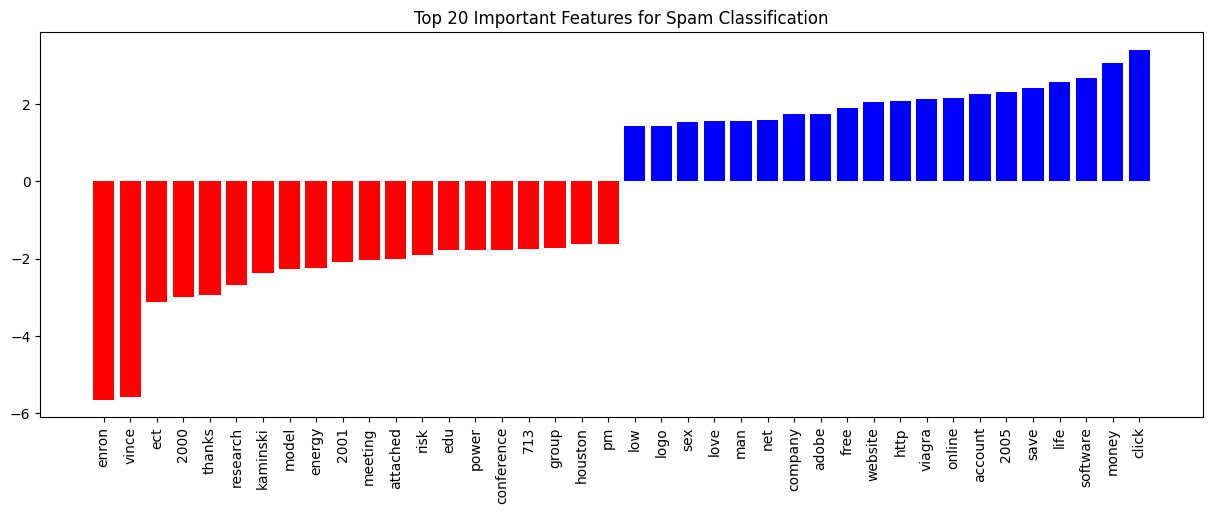

In [45]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

feature_names = feature_extraction.get_feature_names_out()
coefficients = model.coef_.flatten()

# Get the top 20 most important features
top_positive_coefficients = np.argsort(coefficients)[-20:]
top_negative_coefficients = np.argsort(coefficients)[:20]

top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

# Visualize the top features
plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'blue' for c in coefficients[top_coefficients]]
plt.bar(np.array(feature_names)[top_coefficients], coefficients[top_coefficients], color=colors)
plt.title('Top 20 Important Features for Spam Classification')
plt.xticks(rotation=90)
plt.show()

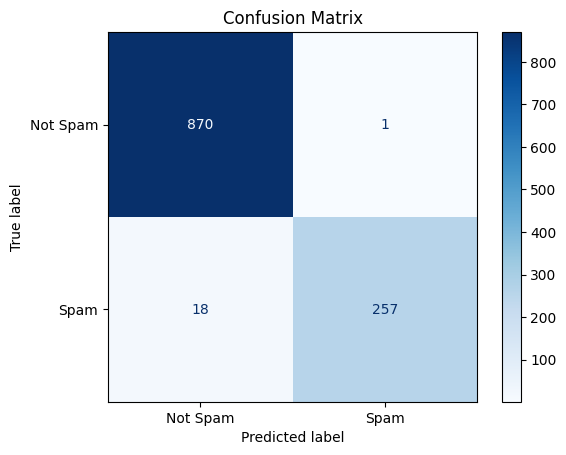

In [46]:
# Predict on test data
Y_pred = model.predict(X_test_features)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred, labels=[0, 1])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

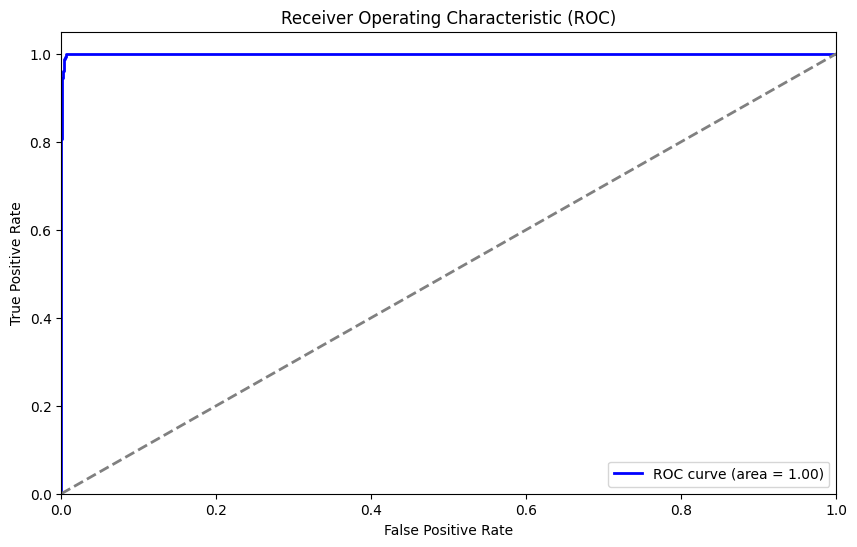

In [47]:
# Predict the probability of the positive class (Spam)
Y_pred_proba = model.predict_proba(X_test_features)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [48]:
# Create the models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the model to a .pkl file
with open('models/spam_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the feature extractor to a .pkl file
with open('models/feature_extractor.pkl', 'wb') as extractor_file:
    pickle.dump(feature_extraction, extractor_file)

In [49]:
# Edit input_mail to test custom input.

input_mail = [""]

input_mail_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_mail_features)

print(prediction)

if(prediction[0] == 0):
    print('Not Spam!')
else:
    print('Spam!')

[0]
Not Spam!
